In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [241]:
table['standardized topic']=(table['air pollution topic']  -  table['air pollution topic'].mean()) /table['air pollution topic'].std()

In [242]:
def signal_process(table,threshold = 40, duration = 6,var_name='standardized topic'):
    """Find the spike in pm25 and plot a sliding window for google trend """
    index_list=np.where(table['PM25']>threshold)[0]
    shrink_index_list = [index_list[0]]
    date_set ={table.date[index_list[0]]}
    for cnt in range(1,len(index_list)):
        if table.date[index_list[cnt]] in date_set:
            pass
        else:
            shrink_index_list.append(index_list[cnt].copy())
            date_set.add(table.date[index_list[cnt]])
            
    new_table = pd.DataFrame()
    
    for start_index in shrink_index_list:
        this_sequence = table.loc[range(start_index-2,start_index+duration+1),
                                  var_name].values
#         this_sequence = (this_sequence- this_sequence.mean())/this_sequence.std()
        new_table[table['date time'][start_index]] = this_sequence
        
    
    return new_table

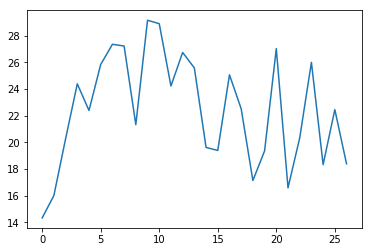

In [243]:
signal_process(table,threshold = 35,duration = 24,var_name='air pollution topic').mean(axis=1).plot()
plt.show()

In [244]:
from pandas import RangeIndex

In [247]:
signal_table = signal_process(table,threshold = 35,duration =24)
signal_table.index = RangeIndex(start=-2, stop=25, step=1)

,date time,date,hour,PM25,PM10,O3,NO2,CO,air pollution topic,isPartial,standardized topic
0,2018-01-31 00:00:00,31/01/2018,1.0,7.0,9,47,14,200,35,False,0.872563
1,2018-01-31 01:00:00,31/01/2018,2.0,6.0,9,50,11,200,30,False,0.576752
2,2018-01-31 02:00:00,31/01/2018,3.0,5.0,10,53,10,200,43,False,1.345860
3,2018-01-31 03:00:00,31/01/2018,4.0,6.0,9,53,10,200,0,False,-1.198112
4,2018-01-31 04:00:00,31/01/2018,5.0,8.0,9,53,11,200,0,False,-1.198112


In [253]:
table.head()

,date time,date,hour,PM25,PM10,O3,NO2,CO,air pollution topic,isPartial,standardized topic
0,2018-01-31 00:00:00,31/01/2018,1.0,7.0,9,47,14,200,35,False,0.872563
1,2018-01-31 01:00:00,31/01/2018,2.0,6.0,9,50,11,200,30,False,0.576752
2,2018-01-31 02:00:00,31/01/2018,3.0,5.0,10,53,10,200,43,False,1.345860
3,2018-01-31 03:00:00,31/01/2018,4.0,6.0,9,53,10,200,0,False,-1.198112
4,2018-01-31 04:00:00,31/01/2018,5.0,8.0,9,53,11,200,0,False,-1.198112


In [261]:
signal_process(table,threshold = 35,duration = 24,var_name='PM25').mean(axis=1).values

array([32.83870968, 35.06451613, 40.06451613, 40.09677419, 38.8       ,
       38.20689655, 37.62068966, 35.51612903, 33.70967742, 32.74193548,
       32.3       , 30.        , 28.21428571, 27.82142857, 27.4137931 ,
       26.96666667, 27.38709677, 27.93548387, 27.46666667, 27.        ,
       27.23333333, 27.1       , 26.46666667, 26.96428571, 26.67857143,
       26.34482759, 26.26666667])

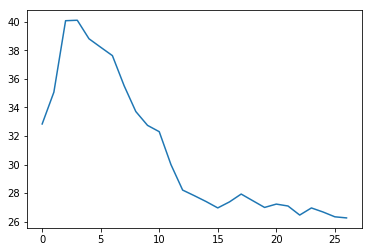

In [255]:
signal_process(table,threshold = 35,duration = 24,var_name='PM25').mean(axis=1).plot()
plt.show()

In [246]:
signal_table.head()

,2018-02-06 19:00:00,2018-02-07 09:00:00,2018-02-08 07:00:00,2018-02-09 00:00:00,2018-02-17 21:00:00,2018-02-18 00:00:00,2018-02-21 01:00:00,2018-02-22 00:00:00,2018-02-28 20:00:00,2018-03-01 05:00:00,...,2018-05-23 06:00:00,2018-05-24 05:00:00,2018-06-04 21:00:00,2018-06-05 00:00:00,2018-06-06 09:00:00,2018-06-09 04:00:00,2018-06-10 00:00:00,2018-06-11 00:00:00,2018-07-14 01:00:00,2018-07-26 21:00:00
-2,-0.429004,-0.961463,0.576752,-0.902301,-0.547328,-0.606491,-0.192356,-0.133193,-0.429004,-1.198112,...,-0.074031,1.227536,1.227536,-0.014869,0.517590,-1.198112,-0.014869,0.872563,-0.014869,0.695076
-1,0.044293,-0.429004,-0.369842,-0.133193,-0.724815,-0.783977,-0.310680,0.162617,-0.724815,-1.198112,...,1.345860,-0.074031,1.523346,-0.133193,0.695076,-1.198112,-1.198112,-0.014869,0.872563,0.695076
0,0.044293,-0.014869,-0.606491,-0.251518,-0.961463,-0.547328,-1.198112,2.114968,-0.133193,-0.429004,...,2.055805,2.824913,0.576752,0.576752,0.340104,-1.198112,-0.547328,-1.198112,-1.198112,0.458428
1,0.754239,0.340104,-0.014869,3.712345,-0.606491,-1.198112,-1.198112,-1.198112,-0.547328,-0.783977,...,1.405022,1.405022,-0.014869,-1.198112,-0.547328,-1.198112,-0.251518,0.103455,3.298210,1.700833
2,-0.961463,0.162617,0.517590,-1.198112,-0.783977,-1.198112,1.227536,-1.198112,-0.547328,-0.014869,...,0.635914,0.931725,-0.133193,4.067318,0.872563,0.458428,-1.198112,0.458428,-1.198112,3.120724


In [262]:
signal_table['avg_trend'] = signal_table.mean(axis=1)
signal_table['avg_pm25'] = signal_process(table,threshold = 35,duration = 24,var_name='PM25').mean(axis=1).values

In [263]:
signal_table.shape

(27, 33)

In [264]:
signal_table.to_csv("updated_air_parif_threshold_35_duration_24H.csv")